## Aula 4: Visualização de Dados I


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Matplotlib

O objetivo é mostrar os comandos básicos do matplotlib

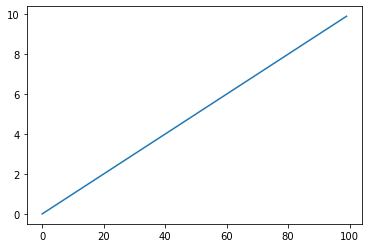

In [10]:
#Criando gráfico básico
array = np.arange(0,10,0.1)
plt.plot(array)

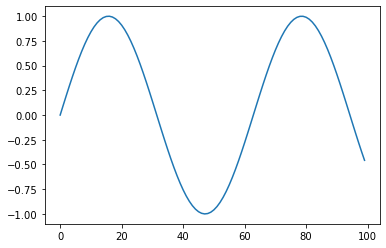

In [11]:
#Criando seno
seno = np.sin(array)
plt.plot(seno)

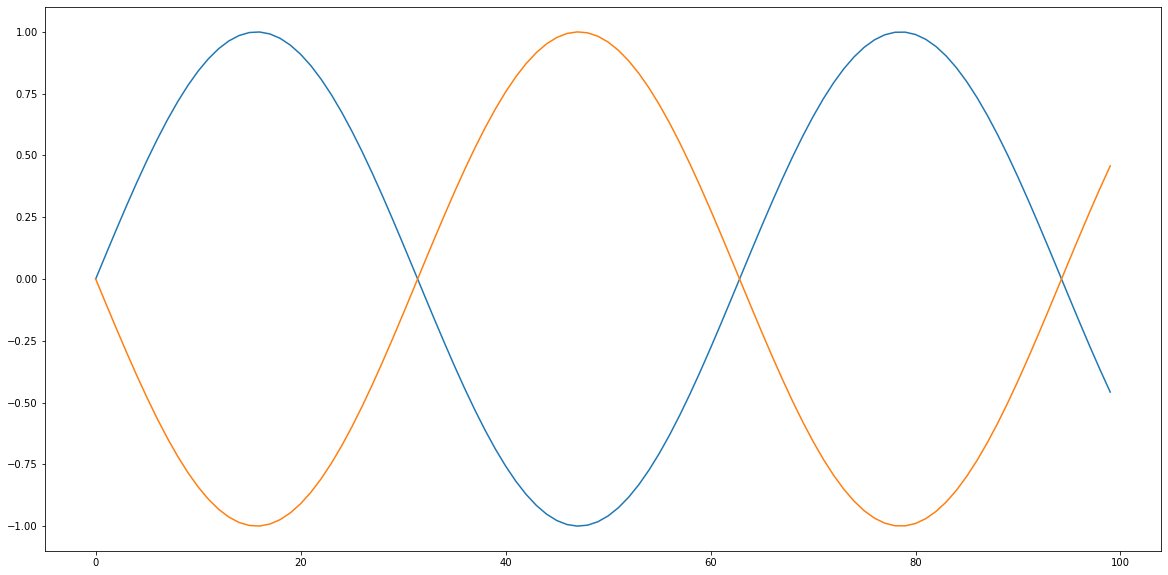

In [12]:
#mudando tamanho e tambem fazendo 2 plots no mesmo axes
figure = plt.figure(figsize=(20,10))
plt.plot(seno)
plt.plot(seno*-1)
#mostrar figura sendo salva
#figure.savefig('Saida.png')

#### Alterando nomes dos eixos e acrescentando titulo

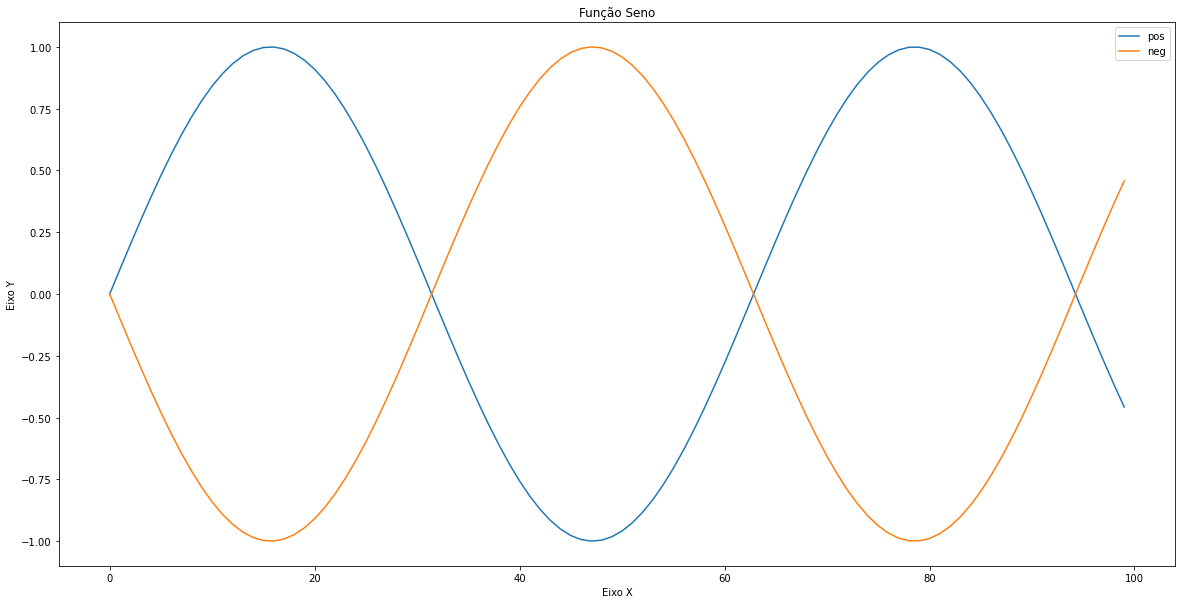

In [13]:
figura = plt.figure(figsize=(20,10))
#colocando o titulo
plt.title("Função Seno")
#plots de seno
plt.plot(seno, label='pos')
plt.plot(seno*-1, label='neg')
#colocando os eixos
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.legend()

#### Mudando cores e estilo das linhas
[markers](https://matplotlib.org/stable/api/markers_api.html)

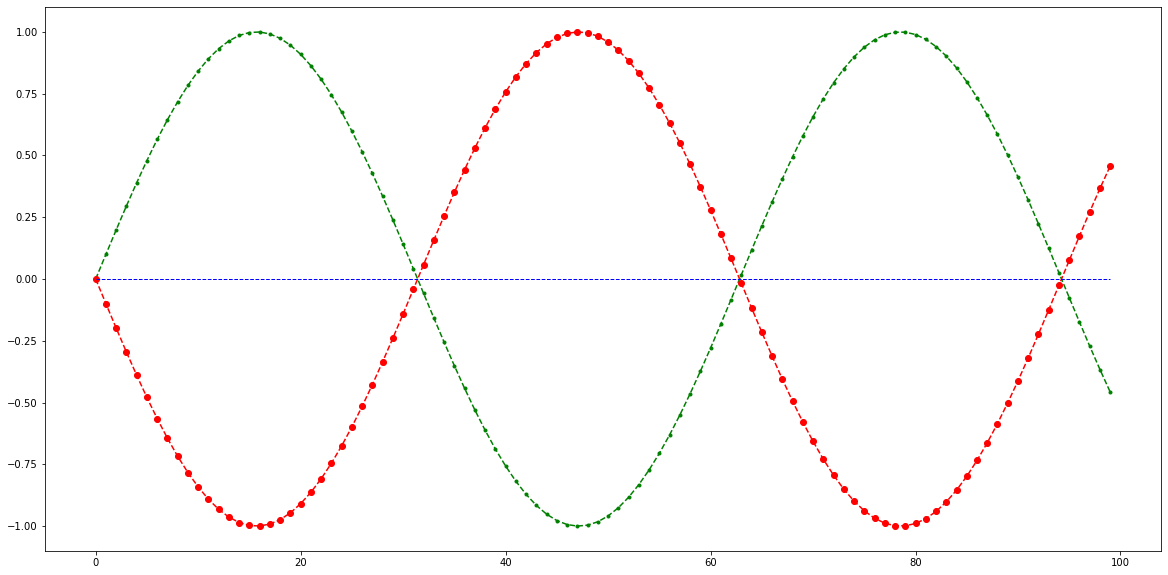

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(seno,color='green',linestyle='--', marker='.')
plt.plot(array*10,seno*-1,'r--o')
plt.plot(np.zeros(100), 'b--', linewidth=1, markersize=5)

#### Adicionando legendas 


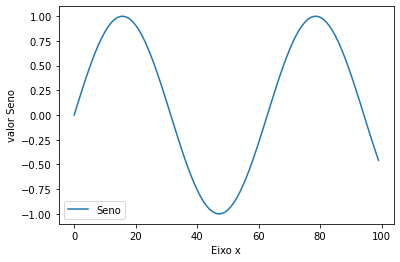

In [14]:
plt.plot(array*10,seno,label='Seno')
plt.xlabel("Eixo x")
plt.ylabel("valor Seno")
plt.legend()

##### Adicionando legendas em posições prefixadas**

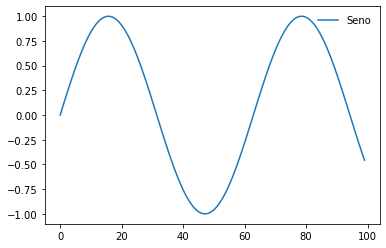

In [17]:
plt.plot(array*10,seno,label='Seno')
plt.legend(frameon=False,loc='upper right')

##### Outros
outros exemplos de [legenda](http://jb-blog.readthedocs.io/en/latest/posts/0012-matplotlib-legend-outdide-plot.html).

#### Subplots


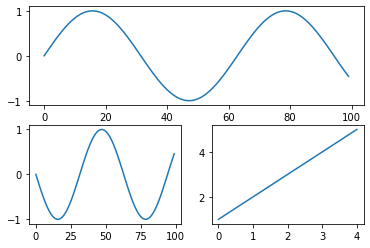

In [46]:
gridsize = (2,2)

lista = [1,2,3,4,5]
ax1 = plt.subplot2grid(gridsize,(0, 0),colspan = 2,rowspan = 1)
ax2 = plt.subplot2grid(gridsize,(1, 0))
ax3 = plt.subplot2grid(gridsize,(1, 1))

ax1.plot(seno)
ax2.plot(seno*-1)
ax3.plot(lista)

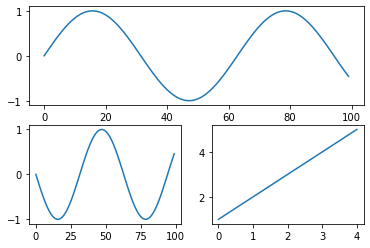

In [62]:
plt.subplot(2, 1, 1)
plt.plot(seno)

plt.subplot(2, 2, 3)
plt.plot(seno*-1)

plt.subplot(2, 2, 4)
plt.plot(lista)

#### Pie

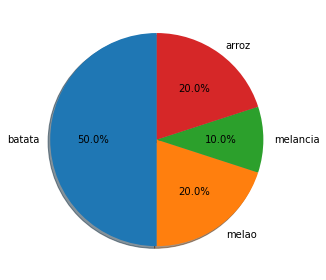

In [4]:
def pie_graph(labels,values):
    
    fig, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

#     ax1.axis('equal')
    plt.tight_layout()
    
pie_graph(['batata','melao','melancia','arroz'],[50,20,10,20])

#### Bar + line

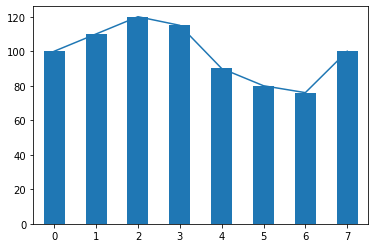

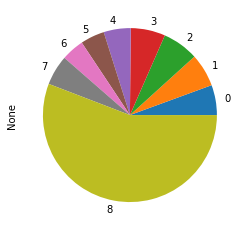

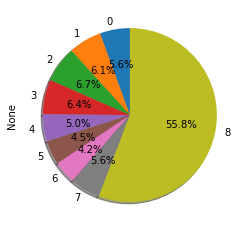

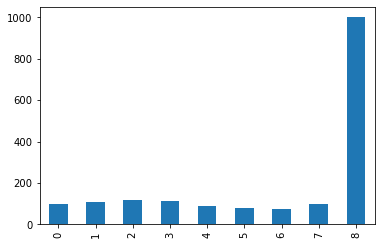

In [70]:
pd.Series([100,110,120,115,90,80,76,100]).plot(kind = 'bar')
pd.Series([100,110,120,115,90,80,76,100]).plot(kind = 'line')
plt.show()
pd.Series([100,110,120,115,90,80,76,100,1000]).plot(kind = 'pie')
plt.show()
pd.Series([100,110,120,115,90,80,76,100,1000]).plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
pd.Series([100,110,120,115,90,80,76,100,1000]).plot.bar()

#### Boxplot

mediana -  100.0
Q1 -  87.5
Q3 -  111.25
IQR -  23.75
Q1 - 1.5*IQR -  51.875
Q3 + 1.5*IQR -  146.875


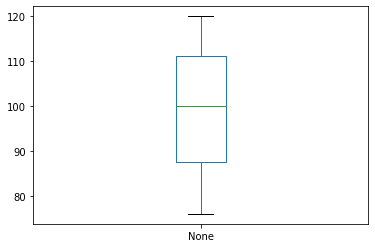

In [71]:
box_series = [100,110,120,115,90,80,76,100]
pd.Series(box_series).plot(kind='box')
print("mediana - ", np.median(box_series))
print('Q1 - ', np.quantile(box_series,0.25))
print('Q3 - ', np.quantile(box_series,0.75))

IQ = np.quantile(box_series,0.75) - np.quantile(box_series,0.25)
print('IQR - ', IQ)
print('Q1 - 1.5*IQR - ',np.quantile(box_series,0.25) - 1.5*IQ)
print('Q3 + 1.5*IQR - ',np.quantile(box_series,0.75) + 1.5*IQ)


# Q1 - 25%
# Q2 - 50%
# Q3 - 75%b

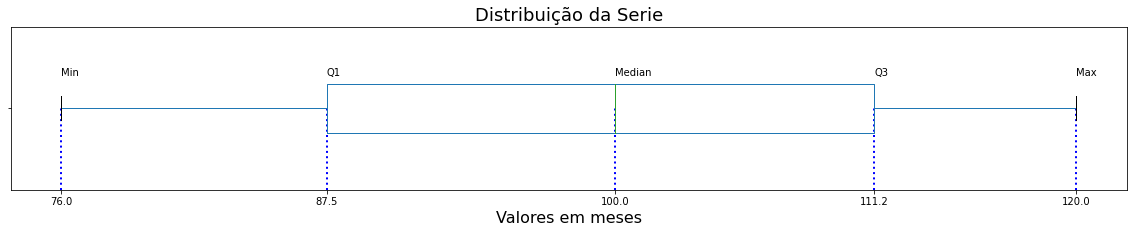

In [121]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.transforms as transforms

def generate_boxplot(box_series):
    fig, ax = plt.subplots(figsize=(20, 3))
    
    pd.Series(box_series).plot.box(vert=False, widths = 0.6, ax=ax)
    quantiles = np.quantile(box_series, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
    ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
              color='b', ls=':', lw=2, zorder=0)

#     ax.set_xlim(left=0)
    ax.set_ylim(0 ,2)

    ax.set_xticks(quantiles)
    ax.set_yticklabels([])


    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    trans_x = transforms.blended_transform_factory(
        ax.get_xticklabels()[0].get_transform(), ax.transData)

    for x, label in zip(list(quantiles), ['Min', 'Q1', 'Median', 'Q3', 'Max']):
        ax.text(x,1.5, label, color="black", transform=trans_x, 
            ha="left", va="top")
    
    plt.title('Distribuição da Serie', fontsize=18)
    plt.xlabel('Valores em meses', fontsize=16)
    plt.show()

generate_boxplot(box_series)

#### Scatter plot

In [170]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

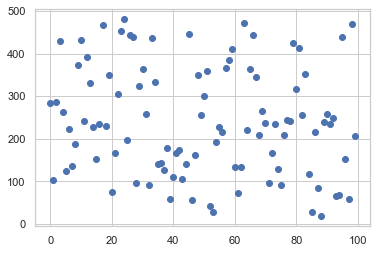

In [172]:
array1 = np.arange(100)
array2 = np.random.randint(0,500,100)

plt.scatter(x = array1,y = array2)

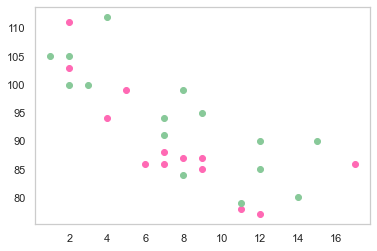

In [175]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y, color = 'hotpink')

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y, color = '#88c999')

plt.grid()

### Problema 1
Carregue o dataset 'tips' localizado na biblioteca do seaborn e gere um relatório com as informações que julgar importantes

Seu relatório deve conter no mínimo 4 perguntas, sendo elas simples e complexas

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')

### Problema 2
Carregue o dataset de avocados e corrija o gráfico abaixo para aparecer somente as 10 regiões com o maior Total Volume.

Todas as regioes que não estiverem no top 10, mostre no gráfico como 'outros'

![pie_graph](../images/pie_graph.png)

### Bônus Aula

In [39]:
pie_df = pd.read_csv("../datasets/avocado.csv")
pie_df

,Date,AveragePrice,Total Volume,year,region
0,2015-12-27,1.33,64236.62,2015,Albany
1,2015-12-20,1.35,54876.98,2015,Albany
2,2015-12-13,0.93,118220.22,2015,Albany
3,2015-12-06,1.08,78992.15,2015,Albany
4,2015-11-29,1.28,51039.60,2015,Albany
...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,2018,WestTexNewMexico


In [45]:
media = pie_df['Total Volume'][:40].mean()
pie_df[:40].style.applymap(lambda x: 'background-color : yellow' if x>media else '', subset=['Total Volume'])


,Date,AveragePrice,Total Volume,year,region
0,2015-12-27,1.330000,64236.620000,2015,Albany
1,2015-12-20,1.350000,54876.980000,2015,Albany
2,2015-12-13,0.930000,118220.220000,2015,Albany
3,2015-12-06,1.080000,78992.150000,2015,Albany
4,2015-11-29,1.280000,51039.600000,2015,Albany
5,2015-11-22,1.260000,55979.780000,2015,Albany
6,2015-11-15,0.990000,83453.760000,2015,Albany
7,2015-11-08,0.980000,109428.330000,2015,Albany
8,2015-11-01,1.020000,99811.420000,2015,Albany
9,2015-10-25,1.070000,74338.760000,2015,Albany


In [52]:
pie_df[:40].style.apply(lambda row: pd.Series('background-color: red', row.index) if row.AveragePrice > 1 else pd.Series('background-color: yellow', row.index), axis=1)

,Date,AveragePrice,Total Volume,year,region
0,2015-12-27,1.330000,64236.620000,2015,Albany
1,2015-12-20,1.350000,54876.980000,2015,Albany
2,2015-12-13,0.930000,118220.220000,2015,Albany
3,2015-12-06,1.080000,78992.150000,2015,Albany
4,2015-11-29,1.280000,51039.600000,2015,Albany
5,2015-11-22,1.260000,55979.780000,2015,Albany
6,2015-11-15,0.990000,83453.760000,2015,Albany
7,2015-11-08,0.980000,109428.330000,2015,Albany
8,2015-11-01,1.020000,99811.420000,2015,Albany
9,2015-10-25,1.070000,74338.760000,2015,Albany


### Bonus aula 2

In [60]:
import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(pie_df)
#display the report
advert_report.show_html('Advertising.html')



Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [61]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(pie_df, test_size=0.2)


In [62]:
df1 = sv.compare(train, test)
df1.show_html('Compare.html')



Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Bônus Aula 3


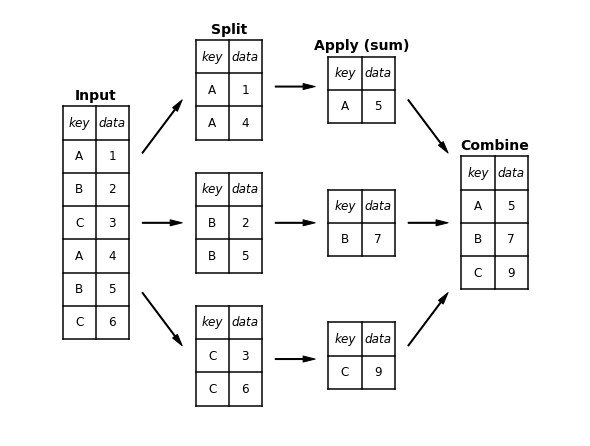

In [53]:
def draw_dataframe(df, loc=None, width=None, ax=None, linestyle=None,
                   textstyle=None):
    loc = loc or [0, 0]
    width = width or 1

    x, y = loc

    if ax is None:
        ax = plt.gca()

    ncols = len(df.columns) + 1
    nrows = len(df.index) + 1

    dx = dy = width / ncols

    if linestyle is None:
        linestyle = {'color':'black'}

    if textstyle is None:
        textstyle = {'size': 12}

    textstyle.update({'ha':'center', 'va':'center'})

    # draw vertical lines
    for i in range(ncols + 1):
        plt.plot(2 * [x + i * dx], [y, y + dy * nrows], **linestyle)

    # draw horizontal lines
    for i in range(nrows + 1):
        plt.plot([x, x + dx * ncols], 2 * [y + i * dy], **linestyle)

    # Create index labels
    for i in range(nrows - 1):
        plt.text(x + 0.5 * dx, y + (i + 0.5) * dy,
                 str(df.index[::-1][i]), **textstyle)

    # Create column labels
    for i in range(ncols - 1):
        plt.text(x + (i + 1.5) * dx, y + (nrows - 0.5) * dy,
                 str(df.columns[i]), style='italic', **textstyle)
        
    # Add index label
    if df.index.name:
        plt.text(x + 0.5 * dx, y + (nrows - 0.5) * dy,
                 str(df.index.name), style='italic', **textstyle)

    # Insert data
    for i in range(nrows - 1):
        for j in range(ncols - 1):
            plt.text(x + (j + 1.5) * dx,
                     y + (i + 0.5) * dy,
                     str(df.values[::-1][i, j]), **textstyle)


#----------------------------------------------------------
# Draw figure
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.DataFrame({'data': [1, 2, 3, 4, 5, 6]},
                   index=['A', 'B', 'C', 'A', 'B', 'C'])
df.index.name = 'key'


fig = plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.axes([0, 0, 1, 1])

ax.axis('off')

draw_dataframe(df, [0, 0])

for y, ind in zip([3, 1, -1], 'ABC'):
    split = df[df.index == ind]
    draw_dataframe(split, [2, y])

    sum = pd.DataFrame(split.sum()).T
    sum.index = [ind]
    sum.index.name = 'key'
    sum.columns = ['data']
    draw_dataframe(sum, [4, y + 0.25])
    
result = df.groupby(df.index).sum()
draw_dataframe(result, [6, 0.75])

style = dict(fontsize=14, ha='center', weight='bold')
plt.text(0.5, 3.6, "Input", **style)
plt.text(2.5, 4.6, "Split", **style)
plt.text(4.5, 4.35, "Apply (sum)", **style)
plt.text(6.5, 2.85, "Combine", **style)

arrowprops = dict(facecolor='black', width=1, headwidth=6)
plt.annotate('', (1.8, 3.6), (1.2, 2.8), arrowprops=arrowprops)
plt.annotate('', (1.8, 1.75), (1.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (1.8, -0.1), (1.2, 0.7), arrowprops=arrowprops)

plt.annotate('', (3.8, 3.8), (3.2, 3.8), arrowprops=arrowprops)
plt.annotate('', (3.8, 1.75), (3.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (3.8, -0.3), (3.2, -0.3), arrowprops=arrowprops)

plt.annotate('', (5.8, 2.8), (5.2, 3.6), arrowprops=arrowprops)
plt.annotate('', (5.8, 1.75), (5.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (5.8, 0.7), (5.2, -0.1), arrowprops=arrowprops)
    
plt.axis('equal')
plt.ylim(-1.5, 5);

In [32]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

<ipython-input-33-a45874165613>:36: RuntimeWarning: covariance is not positive-semidefinite.
  datasetA = np.random.multivariate_normal(muA, covarianceA, size= sizeA)


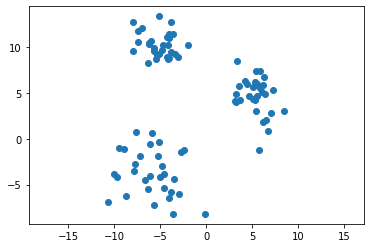

In [33]:
# Data generation
# if we want to repeat our results
np.random.seed(1234)  

# First we set mean for datasetA and datasetB
muA = [-5,-5]
muB = [5,5]
muC = [-5,10]

# Then we set standard deviation for datasetA and datasetB
sigmaAx = 10.0
sigmaAy = 3.0
# covariance
sigmaAxy = -10.0
# covariance matrix
covarianceA = [[sigmaAx, sigmaAxy], [sigmaAxy, sigmaAy]]

sigmaBx = 3.0
sigmaBy = 3.0
# covariance 
sigmaBxy = 0.0
# covariance matrix
covarianceB = [[sigmaBx, sigmaBxy], [sigmaBxy, sigmaBy]]

sigmaCx = 2.0
sigmaCy = 2.0
# covariance 
sigmaCxy = 0.0
# covariance matrix
covarianceC = [[sigmaCx, sigmaCxy], [sigmaCxy, sigmaCy]]

sizeA = 30
sizeB = 30
sizeC = 30

datasetA = np.random.multivariate_normal(muA, covarianceA, size= sizeA)
datasetB = np.random.multivariate_normal(muB, covarianceB, size= sizeB)
datasetC = np.random.multivariate_normal(muC, covarianceC, size= sizeC)

labelsA = ["A" for i in range(sizeA)]
labelsB = ["B" for i in range(sizeB)]
labelsC = ["C" for i in range(sizeC)]
labelsABC = labelsA + labelsB + labelsC

dataT = np.concatenate((datasetA, datasetB, datasetC),)

plt.scatter(dataT[:,0], dataT[:,1])
plt.axis('equal')
plt.show()



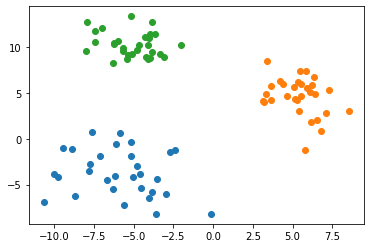

In [34]:
plt.scatter(datasetA[:,0], datasetA[:,1])
plt.scatter(datasetB[:,0], datasetB[:,1])
plt.scatter(datasetC[:,0], datasetC[:,1])


In [35]:
# Compute linkage matrix
# Read https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
# to learn other options

LinkageSC = linkage(dataT, method='single', metric='cosine', optimal_ordering=False)
LinkageAC = linkage(dataT, method='average', metric='cosine', optimal_ordering=False)
LinkageCC = linkage(dataT, method='complete', metric='cosine', optimal_ordering=False)

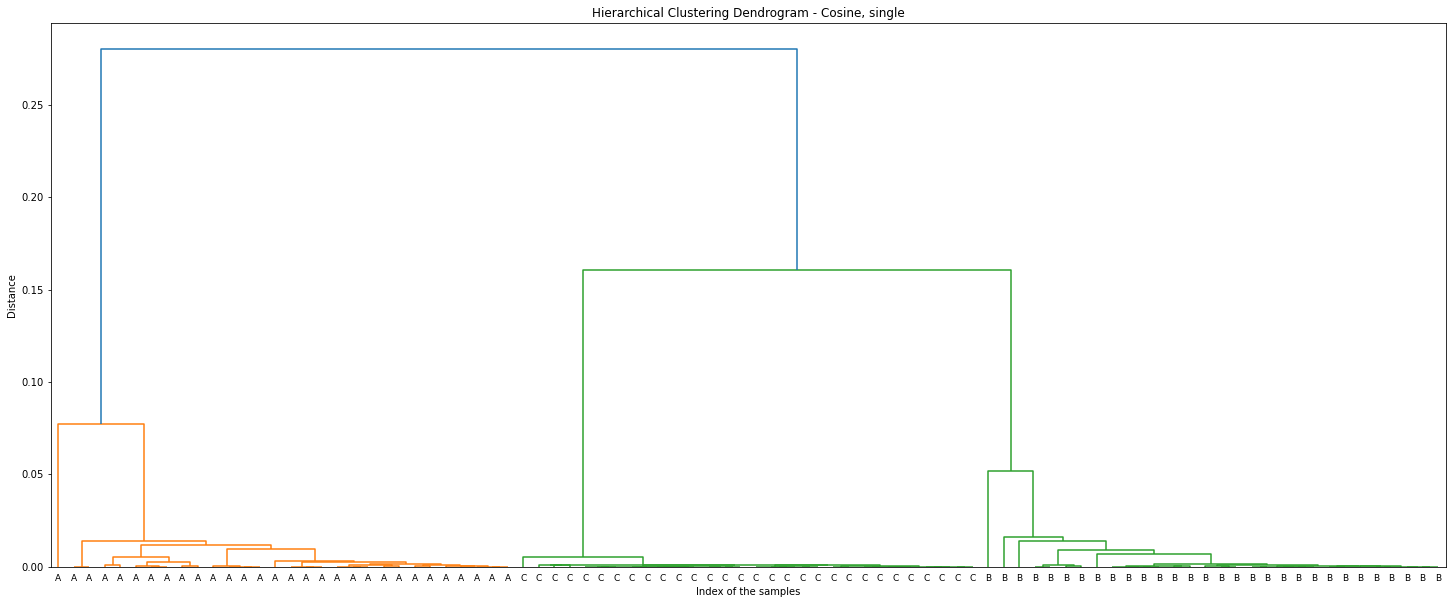

In [36]:
# Plot dendrogram
# Read https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# to learn other options

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Cosine, single')
plt.xlabel('Index of the samples')
plt.ylabel('Distance')
SE = dendrogram(LinkageSC,labels=labelsABC,leaf_rotation=0.0,leaf_font_size=9.0)
plt.show()

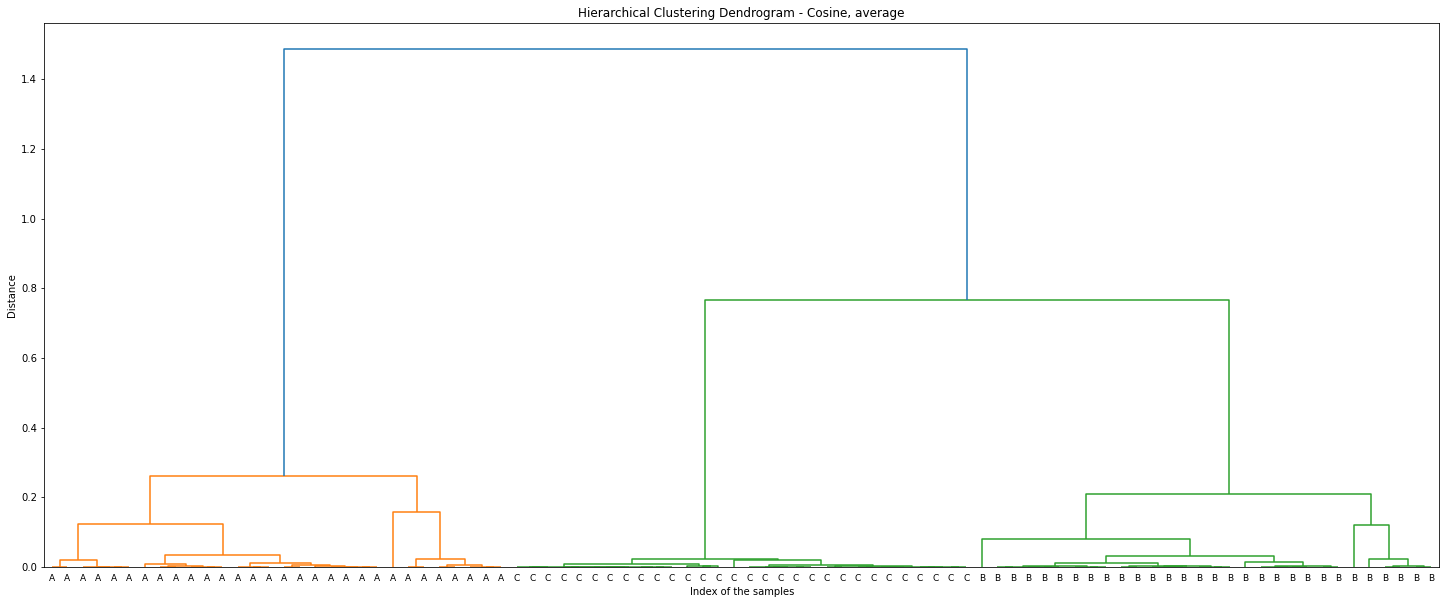

In [37]:
# Plot dendrogram
# Read https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# to learn other options

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Cosine, average')
plt.xlabel('Index of the samples')
plt.ylabel('Distance')
AE = dendrogram(LinkageAC,labels=labelsABC,leaf_rotation=0.0,leaf_font_size=9.0)
plt.show()

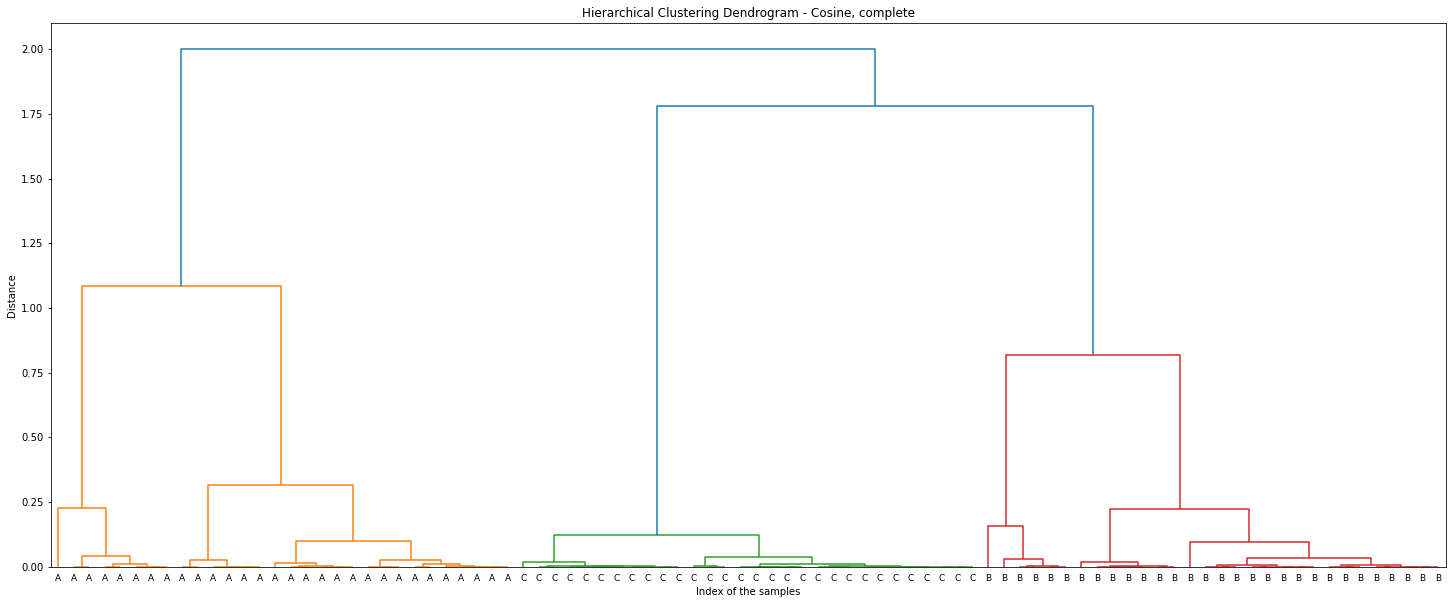

In [38]:
# Plot dendrogram
# Read https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# to learn other options

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Cosine, complete')
plt.xlabel('Index of the samples')
plt.ylabel('Distance')
CE = dendrogram(LinkageCC,labels=labelsABC,leaf_rotation=0.0,leaf_font_size=9.0)
plt.show()

### Referências

https://matplotlib.org/api/axes_api.html?highlight=axes%20class#plotting

https://matplotlib.org/gallery.html#style_sheets

https://matplotlib.org/api/axes_api.html?highlight=axes%20class#plotting